# QSAR: using atomPair fingerprint

In [3]:
#importing necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [4]:
target = new_client.target 
target_query = target.search('aromatase') #target search keyword
df = pd.DataFrame(target_query) #put results in a dataframe for easier reading

In [5]:
df

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P11511', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 19A1,20.0,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P22443', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 19A1,20.0,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116


In [6]:
selected_target = df.target_chembl_id[0]
selected_target

'CHEMBL1978'

In [7]:
activity = new_client.activity 
res = activity.filter(target_chembl_id = selected_target).filter(standard_type = "IC50") #get results on Ic50

In [8]:
df1 = pd.DataFrame(res)

In [9]:
df1.shape #check the shape of the dataframe. 2912 rows and 45 columns

(2912, 45)

In [10]:
df1.head(3) #check the first three rows of the dataframe

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238


In [11]:
df1['standard_type'].unique() #checking if the dataframe was indeed filtered to show only IC50 results

array(['IC50'], dtype=object)

In [12]:
df1.to_csv('bioactivity_acetylcholinesterase.csv', index = False) #save this dataframe as a csv file

In [13]:
df1.isnull().sum() #check how many missing values there are. There are a lot of missing values, but I am only interested in the canonical smiles, the standard value, and the chembl id. There are 76 missing values in the chembl id.

activity_comment             2818
activity_id                     0
activity_properties             0
assay_chembl_id                 0
assay_description               0
assay_type                      0
assay_variant_accession      2912
assay_variant_mutation       2912
bao_endpoint                    0
bao_format                      0
bao_label                       0
canonical_smiles                0
data_validity_comment        2784
data_validity_description    2784
document_chembl_id              0
document_journal               25
document_year                   7
ligand_efficiency             475
molecule_chembl_id              0
molecule_pref_name           2586
parent_molecule_chembl_id       0
pchembl_value                 440
potential_duplicate             0
qudt_units                     47
record_id                       0
relation                       76
src_id                          0
standard_flag                   0
standard_relation              76
standard_text_

There are a lot of missing values in this dataset, but I am only interested in the canonical smiles, the standard value, and the chembl id columns. There are 76 missing values in the chembl id and no missing values in the Standard value and canonical smiles columns.

In [14]:
selection = ['molecule_chembl_id', 'canonical_smiles','standard_value'] #put these columns in a new dataframe
df2 = df1[selection]
df2 

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0
...,...,...,...
2907,CHEMBL4874928,C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...,7900.0
2908,CHEMBL4852023,CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C,3700.0
2909,CHEMBL75,CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...,2400.0
2910,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,23.0


In [15]:
df2.isnull().sum() #there are 76 missing values in standard_value column as I expected.

molecule_chembl_id     0
canonical_smiles       0
standard_value        76
dtype: int64

In [16]:
df2.shape

(2912, 3)

In [17]:
df2.dtypes #the standard value is also considered as an object instead of being a float. I will need to change that for my analysis.

molecule_chembl_id    object
canonical_smiles      object
standard_value        object
dtype: object

In [18]:
df2['standard_value'] = df2['standard_value'].astype(float) #changing standard value column to float

/var/folders/pm/w5w2y4_s0ln4p5gqdsgrgrqr0000gn/T/ipykernel_2641/3086842684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['standard_value'] = df2['standard_value'].astype(float) #changing standard value column to float


In [19]:
df2.dtypes #confirming that the previous step was executed properly

molecule_chembl_id     object
canonical_smiles       object
standard_value        float64
dtype: object

In [20]:
df2 = df2.dropna() #As there are only 76 missing values, which are relatively a small amount of missing values compared to the whole dataset, I'll be deleting them.

In [21]:
df2.isnull().sum() #now there are no more missing values

molecule_chembl_id    0
canonical_smiles      0
standard_value        0
dtype: int64

Because my standard_value column is now considered as a float, I can now make some operations for each value. I can classify a compound as being inactive active and intermediate based on their IC50 standard value. If the IC50 is more than 10000 nM, I'll set it as inactive. If it's less than 1000, I'll set it as active and if it's in between 1000 and 10000, I'll set it as intermediate.

In [22]:
bioactivity_class =[]
for i in df2['standard_value']:
    if i >= 10000:
        bioactivity_class.append("inactive")
    elif i < 1000:
        bioactivity_class.append("active")
    else:
        bioactivity_class.append("intermediate")

In [23]:
df3 = pd.DataFrame(bioactivity_class) #i'll convert the bioactivity class list to a dataframe so that I can add this to my previous dataframe.

In [24]:
df3.isnull().sum() #just checking that I have no missing values here.

0    0
dtype: int64

In [25]:
df3.columns = ['bioactivity class'] #renaming the column

In [26]:
df3.shape #checking if the number of rows are the same as the previous dataframe's 

(2836, 1)

In [27]:
df2.shape

(2836, 3)

In [28]:
df2.isnull().sum() 

molecule_chembl_id    0
canonical_smiles      0
standard_value        0
dtype: int64

In [29]:
df4 = pd.concat([df2.reset_index(drop=True), df3.reset_index(drop=True)], axis = 1) #now i'll merge these two dataframes and name it as df4

In [30]:
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active
...,...,...,...,...
2831,CHEMBL4874928,C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...,7900.0,intermediate
2832,CHEMBL4852023,CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C,3700.0,intermediate
2833,CHEMBL75,CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...,2400.0,intermediate
2834,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,23.0,active


In [31]:
df4.isnull().sum() 

molecule_chembl_id    0
canonical_smiles      0
standard_value        0
bioactivity class     0
dtype: int64

I will rename columns to make them look better.

In [32]:
df4.columns = ['Molecule ChEMBL ID', 'Canonical Smiles', 'Standard Value', 'bioactivity class'] #i will polish the column header names

In [33]:
df4.head() 

,Molecule ChEMBL ID,Canonical Smiles,Standard Value,bioactivity class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active


Next, I will need to convert all the IC50 to pIC50. I will be using Numpy for this, specifically the negative log function.

In [34]:
import numpy as np
df4["pIC50"] = -np.log10(df4['Standard Value'] * 1e-9)

/Users/elisha-fred/miniforge3/envs/base_env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [35]:
df4['Standard Value'].describe()

count    2.836000e+03
mean     2.214962e+10
std      7.303889e+11
min      0.000000e+00
25%      1.068625e+02
50%      1.091340e+03
75%      7.617500e+03
max      3.388442e+13
Name: Standard Value, dtype: float64

Next, I will be capping the standard value to 100000000 to avoid getting negative values 

In [36]:
-np.log10((10 ** -9) *3.311311e+14)

-5.519999971824542

In [106]:
-np.log10((10 ** -9) *100_000_000)

1.0

In [38]:
stdvalue = [] #capping standard value to avoid getting negative values
for i in df4['Standard Value']:
    if i > 100_000_000:
        i = 100_000_000
    else:
        i = i
    stdvalue.append(i)

In [39]:
df4['Standard Value'] = pd.Series(stdvalue)

In [40]:
df4.head()

,Molecule ChEMBL ID,Canonical Smiles,Standard Value,bioactivity class,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active,7.267606


In [41]:
df4.describe() #max std value capped at 100000000

,Standard Value,pIC50
count,2.836000e+03,2836.000000
mean,3.249726e+05,inf
std,4.997506e+06,NaN
min,0.000000e+00,-4.530000
25%,1.068625e+02,5.118191
50%,1.091340e+03,5.962040
75%,7.617500e+03,6.971179
max,1.000000e+08,inf


In [107]:
df4.to_csv('aromatase2.csv', index = False)

In [108]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Molecule ChEMBL ID  2836 non-null   object 
 1   Canonical Smiles    2836 non-null   object 
 2   Standard Value      2836 non-null   float64
 3   bioactivity class   2836 non-null   object 
 4   pIC50               2836 non-null   float64
dtypes: float64(2), object(3)
memory usage: 110.9+ KB


In [109]:
df4

,Molecule ChEMBL ID,Canonical Smiles,Standard Value,bioactivity class,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active,7.267606
...,...,...,...,...,...
2831,CHEMBL4874928,C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...,7900.0,intermediate,5.102373
2832,CHEMBL4852023,CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C,3700.0,intermediate,5.431798
2833,CHEMBL75,CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...,2400.0,intermediate,5.619789
2834,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,23.0,active,7.638272


In [44]:
moldata = []
for i in df4['Canonical Smiles']:
    mols = Chem.MolFromSmiles(i)
    moldata.append(mols)

In [51]:
#plot std value and plot pIC50

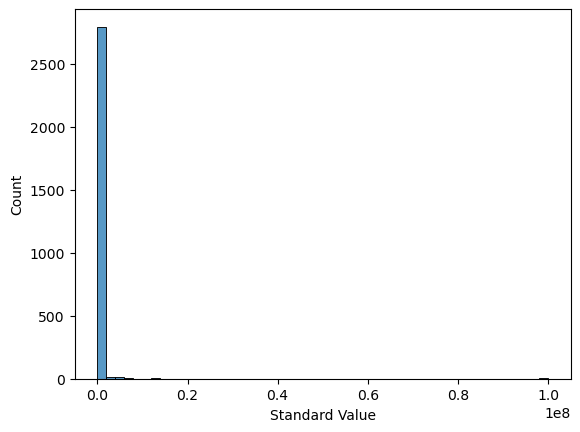

In [110]:
import seaborn as sns
sns.histplot(x= "Standard Value",bins = 50, data = df4);

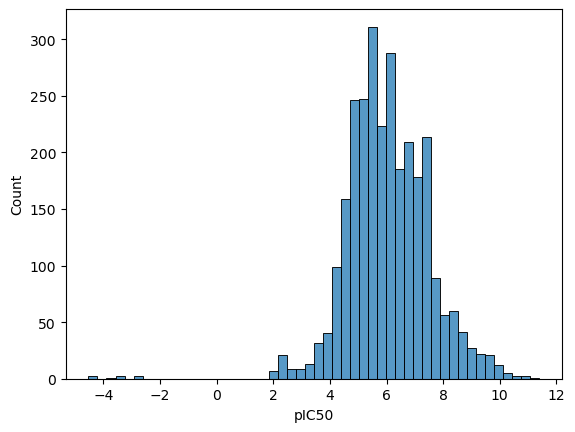

In [111]:
sns.histplot(x= "pIC50",bins = 50, data = df4);

In [112]:
df4.drop(df4[df4['bioactivity class'] == 'intermediate'].index, inplace=True)

In [113]:
df4.shape

(2000, 5)

In [114]:
df4['bioactivity class'].unique()

array(['inactive', 'active'], dtype=object)

In [115]:
df_combined = df4.drop('Standard Value', axis = 1)

In [116]:
df_combined.shape

(2000, 4)

In [117]:
df_combined.head(3)

,Molecule ChEMBL ID,Canonical Smiles,bioactivity class,pIC50
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,7.244125


## EDA

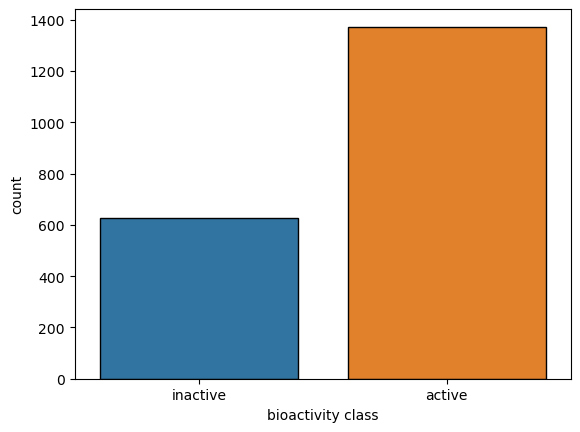

In [118]:
sns.countplot(x = 'bioactivity class', data = df_combined, edgecolor = 'black');

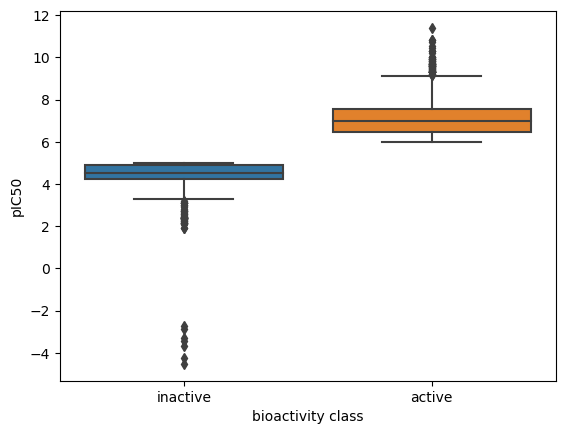

In [119]:
sns.boxplot(x = 'bioactivity class', y = 'pIC50', data = df_combined);

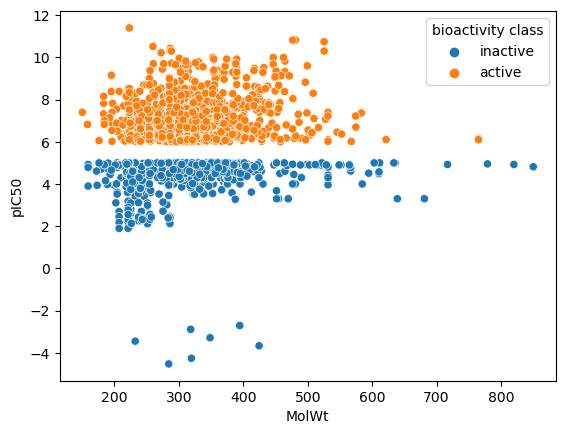

In [62]:
sns.scatterplot(x = 'MolWt', y='pIC50', hue = 'bioactivity class', data = df_combined);

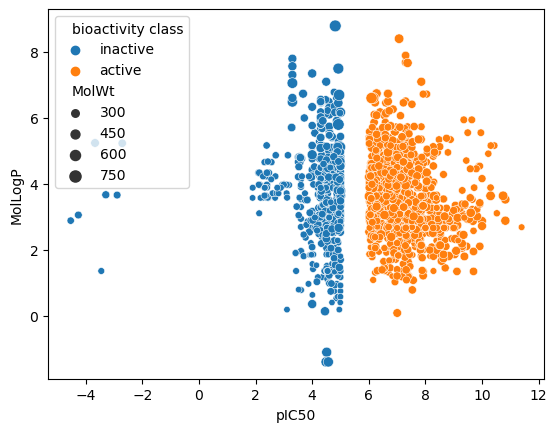

In [63]:
sns.scatterplot(x = 'pIC50', y='MolLogP', hue = 'bioactivity class', size = 'MolWt', data = df_combined);

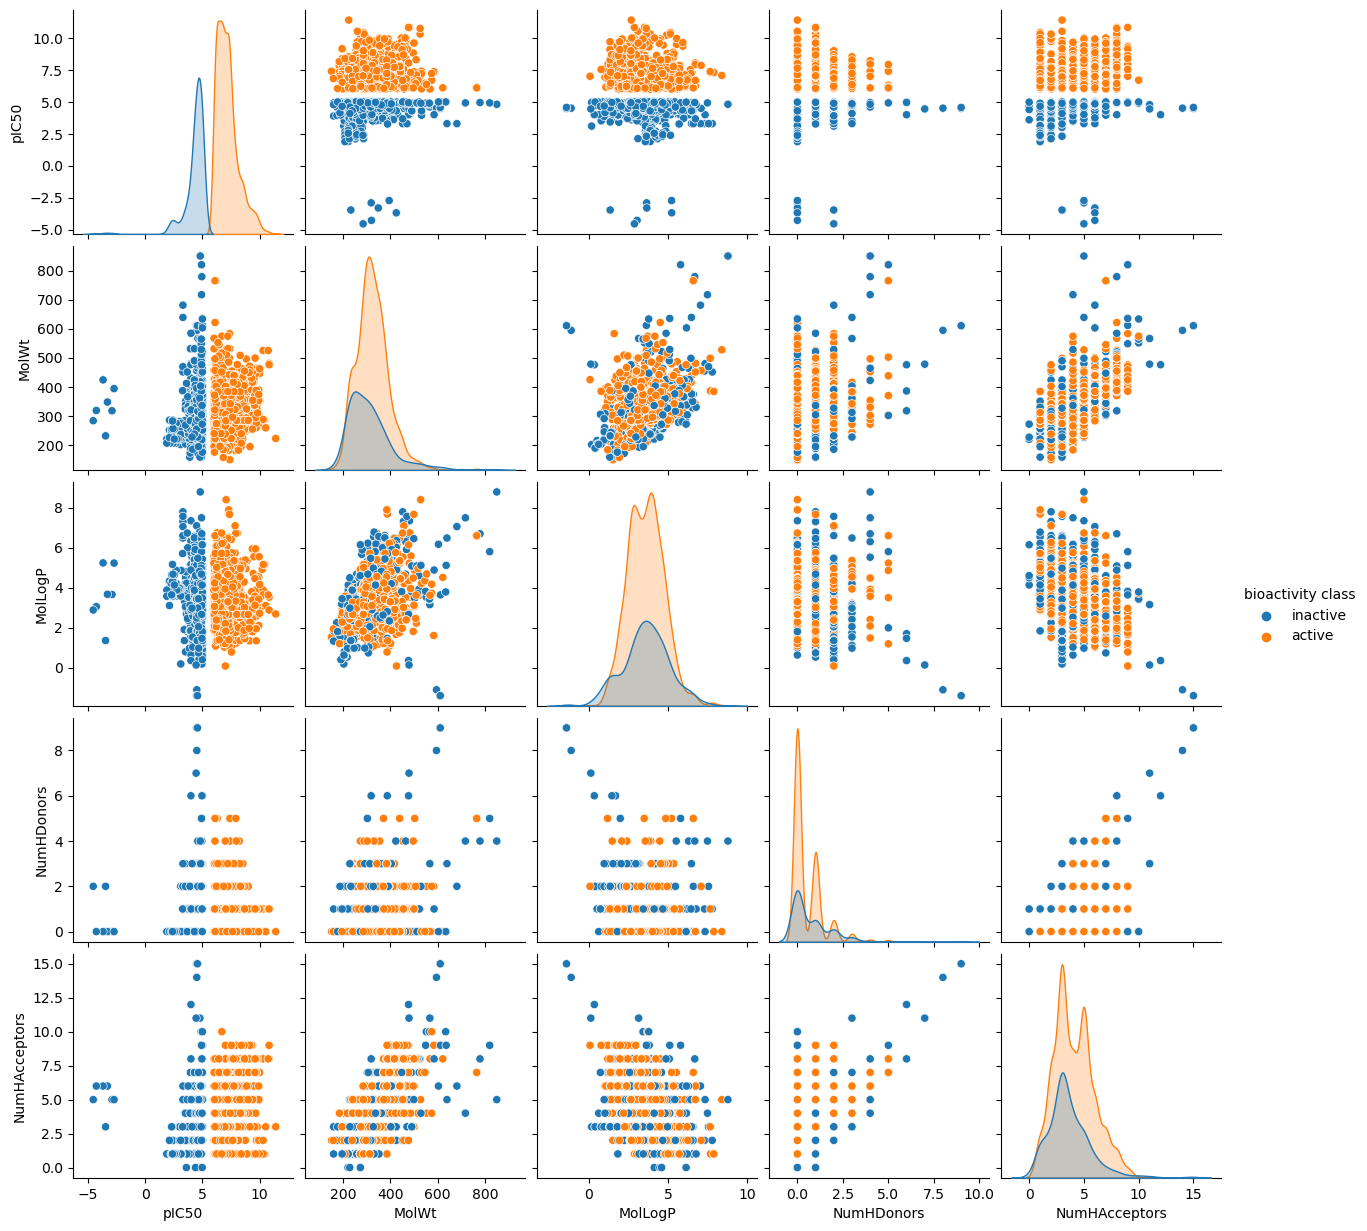

In [64]:
sns.pairplot(df_combined, hue = 'bioactivity class');

## Getting Atom Pair Fingerprints

In [122]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(df_combined, smilesCol='Canonical Smiles')
df_combined.head(1)

,Molecule ChEMBL ID,Canonical Smiles,bioactivity class,pIC50,ROMol
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,4.30103,<rdkit.Chem.rdchem.Mol object at 0x17cdf0ac0>


In [121]:
from rdkit.Chem import rdMolDescriptors
nBits = 512
AP = [rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(i, nBits = 512) for i in df_combined['ROMol']]

In [68]:
len(AP[0]) 

512

In [69]:
ap_name = [f'Bit{i}' for i in range(nBits)]
ap_bits = [list(l) for l in AP]
df_fp = pd.DataFrame(ap_bits, index = df_combined['Molecule ChEMBL ID'], columns=ap_name)
df_fp.head(1)

,Bit0,Bit1,Bit2,Bit3,Bit4,Bit5,Bit6,Bit7,Bit8,Bit9,...,Bit502,Bit503,Bit504,Bit505,Bit506,Bit507,Bit508,Bit509,Bit510,Bit511
Molecule ChEMBL ID,,,,,,,,,,,,,,,,,,,,,
CHEMBL2111947,0,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


Dimensionality Reduction by PCA

Because there are a lot of fingerprint values, we can use PCA to reduce the features.

In [70]:
# Scree plot
from sklearn.decomposition import PCA
X = df_fp
pca = PCA()
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,3.926736,-2.173467,2.294866,2.459299,0.510026,0.595609,0.044337,-0.124276,0.066764,0.800669,...,0.002573,0.008523,-0.007178,0.002383,0.000916,-1.017297e-14,7.183058e-16,1.369251e-16,-7.780950e-16,1.984003e-16
1,-1.058069,3.010618,0.342637,0.870115,0.227590,-0.513843,-1.185271,2.086426,-1.454435,0.873318,...,-0.017376,0.012394,-0.017779,0.009617,0.000030,6.951016e-16,-3.532155e-16,1.235342e-16,-3.091390e-16,2.004502e-16
2,-2.093556,1.689757,0.985096,0.089811,-0.669214,-1.694672,-0.492999,1.998933,0.041282,0.754241,...,-0.004803,0.005065,-0.000649,-0.000662,-0.000003,5.139350e-16,1.069069e-15,-1.876393e-17,1.856239e-16,-1.694123e-17
3,-2.303779,1.354339,-0.016849,-0.248310,1.126945,-2.082984,-0.939378,0.523838,-0.324224,0.959210,...,-0.023923,-0.011715,0.001216,0.002413,-0.004971,1.170016e-14,-1.050788e-15,1.648642e-16,3.753169e-16,2.619825e-16
4,-2.923724,2.225396,1.395588,0.185473,-0.423472,-0.619629,0.638390,1.722130,-0.204999,0.748504,...,-0.000130,-0.000739,-0.003005,0.002371,0.001891,-2.588370e-15,-6.916757e-16,-1.406862e-16,-2.461043e-16,9.205768e-17


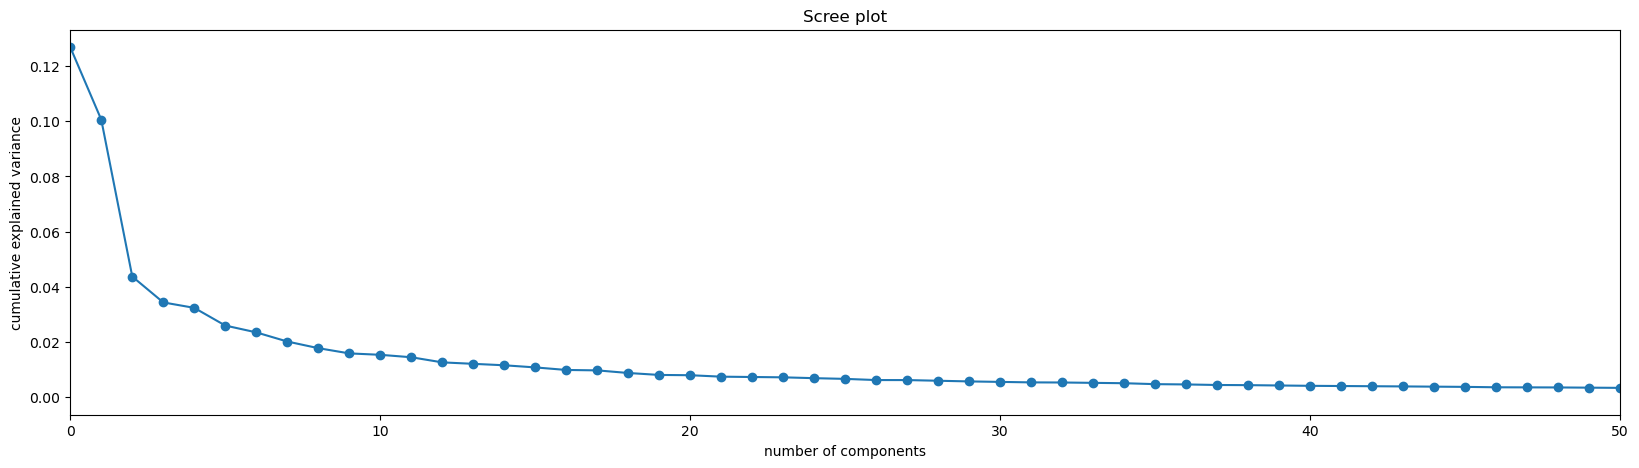

In [71]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(20,5))
plt.plot(pca.explained_variance_ratio_, marker = 'o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.xlim([0,50])
plt.show()

It seems around num of components = 20, the variance in the data set seems to be all explained.

In [72]:
df_pca_fin = pd.DataFrame(X_pca[:, 0:20])
df_pca_fin.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3.926736,-2.173467,2.294866,2.459299,0.510026,0.595609,0.044337,-0.124276,0.066764,0.800669,-0.515189,0.682552,1.023809,0.042835,-0.603808,0.078865,0.256422,1.696986,-0.200425,1.059788
1,-1.058069,3.010618,0.342637,0.870115,0.227590,-0.513843,-1.185271,2.086426,-1.454435,0.873318,-0.711474,-1.374836,-0.524686,0.435024,-0.768709,1.626710,-1.639195,0.468876,-0.235446,0.286049
2,-2.093556,1.689757,0.985096,0.089811,-0.669214,-1.694672,-0.492999,1.998933,0.041282,0.754241,-1.027304,-1.509469,-1.564414,0.917218,-1.282676,1.516303,-1.926224,0.906231,-1.951027,0.424884
3,-2.303779,1.354339,-0.016849,-0.248310,1.126945,-2.082984,-0.939378,0.523838,-0.324224,0.959210,-0.591260,-1.210931,-0.467953,0.770657,-0.397826,0.541845,-0.879011,1.035020,-1.089314,-0.107897
4,-2.923724,2.225396,1.395588,0.185473,-0.423472,-0.619629,0.638390,1.722130,-0.204999,0.748504,-0.608166,-0.928605,-0.746807,0.699450,-1.128644,1.060887,-1.707414,0.646751,-1.409147,0.424327


Train test split

In [73]:
from sklearn.model_selection import train_test_split
X = df_pca_fin
y = df_combined['bioactivity class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix, classification_report

In [96]:
print(confusion_matrix(y_test, y_pred))

[[247  22]
 [ 38  93]]


In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      active       0.87      0.92      0.89       269
    inactive       0.81      0.71      0.76       131

    accuracy                           0.85       400
   macro avg       0.84      0.81      0.82       400
weighted avg       0.85      0.85      0.85       400



We can also do:
-randomforest regressor

-Lazypredict

-try also variance threshold instead of PCA

-grid search CV for the best hyperparameters? Optimise the hyperparameter of random forest reg.

-cross validation: what is it for again?

In [ ]:
XXXXXXXXXX

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
from sklearn.feature_selection import VarianceThreshold
ver_thres = VarianceThreshold(threshold = 0.09)
X = ver_thres.fit_transform(X)
X.shape

In [ ]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_train, y_train, y_train)
#models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:
#How can I add the smiles column to this dataset so that I can identify the column?